# Определение перспективного тарифа для телеком компании

Данные представлены в пяти разных таблицах. Их надо будет последовательно обработать и объединить 
* Вначале необходимо посмотреть на содержание таблиц. Изменить тип данных, исправить ошибки, возможно, заполнить пустые значения.
* Там где необходимо, добавить столбцы. В задание требовалось посчитать показатели по месяцам. Значит, для удобства необходимо создать столбец с месяцами
* Для каждой таблицы создать новую таблицу, в которой будут необходимые для анализа показатели
* По объединенной таблице посчитать средние показатели по пользователям разных тарифов
* Проверить гипотезы

### Таблица звонков

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

calls = pd.read_csv('/datasets/calls.csv')

In [4]:
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [5]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


#### Вывод по данным таблицы "звонки"
Тип данных даты "объект" надо заменить на тип даты. Чтобы случайно не производить числовые операции со столбцами id user_id их лучше перевести в строковый формат. Длительность звонков в Мегалайте округляется в большую сторону, эти данные надо перевести в формат инт с округлением в большую сторону

In [6]:
 
calls['user_id'] = calls['user_id'].astype('str') 
calls['id'] = calls['id'].astype('str') 

In [7]:
 calls['call_date'] = pd.to_datetime(calls['call_date'])

In [8]:
#Округление до целого значения в большую сторону длительности звонков
import numpy as np

calls['duration'] = calls['duration'].apply(np.ceil)
calls['duration'] = calls['duration'].astype('int')


In [9]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 6.2+ MB


#### Проблемы в данных "звонки"

In [10]:
calls['duration'].value_counts().head(10)

0     39613
7     11510
6     11457
5     11411
8     11272
9     10973
4     10918
3     10362
10    10186
11     9385
Name: duration, dtype: int64

In [11]:
print('Процент нулевых звонков в общих данных:', 39613/ len(calls))

Процент нулевых звонков в общих данных: 0.19551644316336553


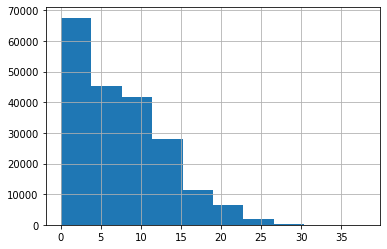

In [12]:
calls['duration'].hist()

Почти 40 тыс значений в стобце "звонки" равны нулю. Можно предположить, что это пропущенные звонки. От общего количества данных это почти 1%. Не так много, если их удалить на результат это не повлияет.

In [13]:
data_calls = calls.query('duration != 0') #новая таблица, чтобы не менять ничего в старой

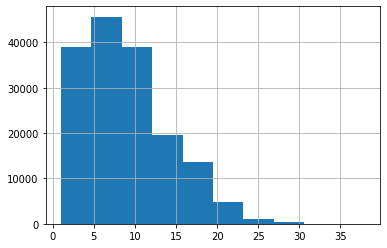

In [14]:
data_calls['duration'].hist()

#### Проблемы в данных "дата", создание дополнительной колонки

In [15]:
data_calls['call_date'].value_counts()

2018-12-31    1173
2018-12-30     959
2018-12-29     959
2018-12-22     957
2018-12-18     942
              ... 
2018-01-07      15
2018-01-06      14
2018-01-02       6
2018-01-01       4
2018-01-03       3
Name: call_date, Length: 365, dtype: int64

In [16]:
data_calls['call_date'].describe()

count                  162994
unique                    365
top       2018-12-31 00:00:00
freq                     1173
first     2018-01-01 00:00:00
last      2018-12-31 00:00:00
Name: call_date, dtype: object

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


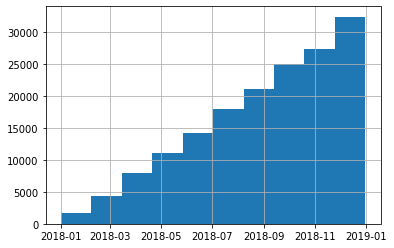

In [17]:
data_calls['call_date'].hist()

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
data_calls['month'] = data_calls['call_date'].dt.month


In [20]:
data_calls.sort_values('month')

,id,call_date,duration,user_id,month
77268,1193_530,2018-01-14,5,1193,1
54327,1135_620,2018-01-31,1,1135,1
156085,1385_164,2018-01-21,4,1385,1
54310,1135_603,2018-01-31,6,1135,1
160575,1395_236,2018-01-28,9,1395,1
...,...,...,...,...,...
112764,1289_622,2018-12-24,2,1289,12
112766,1289_624,2018-12-15,6,1289,12
112770,1289_628,2018-12-25,1,1289,12
112772,1289_630,2018-12-26,15,1289,12


In [21]:

calls_grouped = data_calls.groupby(['user_id','month']).agg({'duration': ('sum', 'count')})

In [22]:
calls_grouped

duration      
                   sum count
user_id month               
1000    5          159    17
        6          172    28
        7          340    41
        8          408    42
        9          466    46
...                ...   ...
1498    10         247    30
1499    9           70     8
        10         449    44
        11         612    62
        12         492    56

[3168 rows x 2 columns]

### Вывод по даным "Звонки"
Нулевые звонки удалили.
К данным добавили новый стобец для анализа по месяцам.
Похоже, что бизнес Мегалайн идет в гору. В январе 2018 было совсем мало звонков, а к концу года пользователи стали активно пользоваться телефонами. 
Создана новая таблица, где есть данные по количеству и длительности звонков по месяцам


### Таблица "интернет"

In [23]:

internet = pd.read_csv('/datasets/internet.csv')

In [24]:
internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [25]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


### Вывод по данным "интернет"
Как и в предыдущей таблице надо изменить типы данных id user_id. дату перевести в тип даты. Округлить количество мегбайтов (помня о политике Мегалайн, округлять нужно в большую сторону) Есть лишняя колонка Unnamed, которую  можно будет удалить, если она будет мешать. Но лучше создать новую таблицу, с нужными для расчетов данными. После обработки надо создать новую таблицу с суммой потраченных мб и объединить данные с предыдущей таблицей

In [26]:
internet['user_id'] = internet['user_id'].astype('str') 
internet['id'] = internet['id'].astype('str')
internet['session_date'] = pd.to_datetime(internet['session_date'])

In [27]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil)
internet['mb_used'] = internet['mb_used'].astype('int')

In [28]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null object
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 5.7+ MB


In [29]:
internet['mb_used'].describe()

count    149396.000000
mean        370.622098
std         278.387019
min           0.000000
25%         139.000000
50%         349.000000
75%         560.000000
max        1725.000000
Name: mb_used, dtype: float64

In [30]:
internet['mb_used'].value_counts()

0       19598
333       231
382       228
377       224
334       222
        ...  
1495        1
1624        1
1371        1
1423        1
1279        1
Name: mb_used, Length: 1424, dtype: int64

В данных есть нулевые значения, похоже, что это люди, которые не пользовались интернетом. Не стоит их исключать из данных. В целом данные не вызывают сомнения. Это же видно по гисограмме 

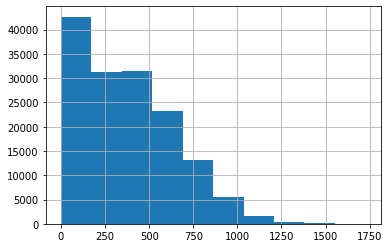

In [31]:
internet['mb_used'].hist()

In [32]:
internet['month'] = internet['session_date'].dt.month #создается новый столбец "месяц"

#### Новая таблица и объединение данных из таблиц "интернет" и "звонки"

In [33]:

internet_grouped = internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'})

In [34]:
internet_grouped

mb_used
user_id month         
1000    5         2256
        6        23257
        7        14016
        8        14070
        9        14581
...                ...
1498    10       20604
1499    9         1848
        10       17809
        11       17984
        12       13077

[3203 rows x 1 columns]

In [35]:
internet_calls = calls_grouped.merge(internet_grouped, on=["user_id", "month"], how="right")

In [36]:
internet_calls

(duration, sum)  (duration, count)  mb_used
user_id month                                             
1000    5                159.0               17.0     2256
        6                172.0               28.0    23257
        7                340.0               41.0    14016
        8                408.0               42.0    14070
        9                466.0               46.0    14581
...                        ...                ...      ...
1489    8                  NaN                NaN    11066
        9                  NaN                NaN    17232
        10                 NaN                NaN    19588
        11                 NaN                NaN    17516
        12                 NaN                NaN    17341

[3203 rows x 3 columns]

### Таблица "сообщения"

In [37]:
messages = pd.read_csv('/datasets/messages.csv')

In [38]:
messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [39]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


### Вывод по данным "сообщения"
Здесь нужно только заменить тип даты, добавить столбец времени и создать новую таблицу, которую присоединится к общей таблице

In [40]:
 
messages['user_id'] = messages['user_id'].astype('str')
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages['month'] = messages['message_date'].dt.month

In [41]:
messages

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
...,...,...,...,...
123031,1499_179,2018-12-12,1499,12
123032,1499_180,2018-09-28,1499,9
123033,1499_181,2018-09-27,1499,9
123034,1499_182,2018-11-15,1499,11


### Создание новой таблицы и присоединение к остальным данным

In [42]:
#new_messages = messages.pivot_table(index = ['user_id', 'month'], values = 'id', aggfunc = ['count'])
messages_grouped = messages.groupby(['user_id', 'month']).agg({'id': 'count'})

In [43]:
messages_grouped

id
user_id month    
1000    5      22
        6      60
        7      75
        8      81
        9      57
...            ..
1498    10     42
1499    9      11
        10     48
        11     59
        12     66

[2717 rows x 1 columns]

In [44]:
internet_calls_messages = internet_calls.merge(messages_grouped, on=["user_id", "month"], how="left")

In [45]:
internet_calls_messages

(duration, sum)  (duration, count)  mb_used    id
user_id month                                                   
1000    5                159.0               17.0     2256  22.0
        6                172.0               28.0    23257  60.0
        7                340.0               41.0    14016  75.0
        8                408.0               42.0    14070  81.0
        9                466.0               46.0    14581  57.0
...                        ...                ...      ...   ...
1489    8                  NaN                NaN    11066  17.0
        9                  NaN                NaN    17232  32.0
        10                 NaN                NaN    19588  21.0
        11                 NaN                NaN    17516  20.0
        12                 NaN                NaN    17341  35.0

[3203 rows x 4 columns]

In [46]:
internet_calls_messages = internet_calls_messages.rename(columns={'id': 'messages_count'}) # переименование столбца с сообщениями

In [47]:
internet_calls_messages.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3203 entries, (1000, 5) to (1489, 12)
Data columns (total 4 columns):
(duration, sum)      3157 non-null float64
(duration, count)    3157 non-null float64
mb_used              3203 non-null int64
messages_count       2706 non-null float64
dtypes: float64(3), int64(1)
memory usage: 113.6+ KB


#### Вывод по таблице "сообщения"
Данные обработаны, тип данных изменен. Создана новая объединенная таблица

### Таблица "пользователи"

In [48]:
users = pd.read_csv('/datasets/users.csv')

In [49]:
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


### Вывод по таблице "Пользователи"
Пропуски в столбце со сменой тарифа можно заменить на последнюю дату исследуемого периода. Создать новый столбец с началом и концом периода использования тарифа. Объединить данные с данными таблицы. Изменить типы данных пользователей и даты. 

In [50]:
users['user_id'] = users['user_id'].astype('str')
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])
users['reg_month'] = users['reg_date'].dt.month

In [51]:
users['churn_date'] = users['churn_date'].fillna('2018-12-31')
users['churn_date'] = pd.to_datetime(users['churn_date'])
users['churn_month'] = users['churn_date'].dt.month

In [52]:
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month
0,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,12
1,1001,41,2018-12-31,Москва,Иван,Ежов,2018-11-01,smart,11,12
2,1002,59,2018-12-31,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6,12
3,1003,23,2018-12-31,Москва,Белла,Белякова,2018-08-17,ultra,8,12
4,1004,68,2018-12-31,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,12
...,...,...,...,...,...,...,...,...,...,...
495,1495,65,2018-12-31,Иркутск,Авксентий,Фокин,2018-08-28,ultra,8,12
496,1496,36,2018-12-31,Вологда,Трифон,Блохин,2018-01-27,smart,1,12
497,1497,32,2018-12-31,Челябинск,Каролина,Агеева,2018-10-09,smart,10,12
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,7,10


In [53]:
users_for_merge = users[['user_id', 'tariff', 'city', 'reg_month', 'churn_month']]

In [54]:
new_data = internet_calls_messages.reset_index().merge(users_for_merge, on=["user_id"], how="left")

In [55]:
new_data

,user_id,month,"(duration, sum)","(duration, count)",mb_used,messages_count,tariff,city,reg_month,churn_month
0,1000,5,159.0,17.0,2256,22.0,ultra,Краснодар,5,12
1,1000,6,172.0,28.0,23257,60.0,ultra,Краснодар,5,12
2,1000,7,340.0,41.0,14016,75.0,ultra,Краснодар,5,12
3,1000,8,408.0,42.0,14070,81.0,ultra,Краснодар,5,12
4,1000,9,466.0,46.0,14581,57.0,ultra,Краснодар,5,12
...,...,...,...,...,...,...,...,...,...,...
3198,1489,8,NaN,NaN,11066,17.0,smart,Санкт-Петербург,8,12
3199,1489,9,NaN,NaN,17232,32.0,smart,Санкт-Петербург,8,12
3200,1489,10,NaN,NaN,19588,21.0,smart,Санкт-Петербург,8,12
3201,1489,11,NaN,NaN,17516,20.0,smart,Санкт-Петербург,8,12


### Разделение таблицы(пользователей) по тарифам

In [56]:
ultra = new_data.query('tariff == "ultra"')
ultra

,user_id,month,"(duration, sum)","(duration, count)",mb_used,messages_count,tariff,city,reg_month,churn_month
0,1000,5,159.0,17.0,2256,22.0,ultra,Краснодар,5,12
1,1000,6,172.0,28.0,23257,60.0,ultra,Краснодар,5,12
2,1000,7,340.0,41.0,14016,75.0,ultra,Краснодар,5,12
3,1000,8,408.0,42.0,14070,81.0,ultra,Краснодар,5,12
4,1000,9,466.0,46.0,14581,57.0,ultra,Краснодар,5,12
...,...,...,...,...,...,...,...,...,...,...
3193,1473,9,NaN,NaN,17307,19.0,ultra,Красноярск,8,12
3194,1473,10,NaN,NaN,13703,20.0,ultra,Красноярск,8,12
3195,1473,11,NaN,NaN,21692,14.0,ultra,Красноярск,8,12
3196,1473,12,NaN,NaN,18432,20.0,ultra,Красноярск,8,12


In [57]:
smart = new_data.query('tariff == "smart"')
smart

,user_id,month,"(duration, sum)","(duration, count)",mb_used,messages_count,tariff,city,reg_month,churn_month
8,1001,11,430.0,45.0,18452,NaN,smart,Москва,11,12
9,1001,12,414.0,47.0,14053,NaN,smart,Москва,11,12
10,1002,6,117.0,14.0,10871,4.0,smart,Стерлитамак,6,12
11,1002,7,214.0,21.0,17601,11.0,smart,Стерлитамак,6,12
12,1002,8,289.0,37.0,20347,13.0,smart,Стерлитамак,6,12
...,...,...,...,...,...,...,...,...,...,...
3198,1489,8,NaN,NaN,11066,17.0,smart,Санкт-Петербург,8,12
3199,1489,9,NaN,NaN,17232,32.0,smart,Санкт-Петербург,8,12
3200,1489,10,NaN,NaN,19588,21.0,smart,Санкт-Петербург,8,12
3201,1489,11,NaN,NaN,17516,20.0,smart,Санкт-Петербург,8,12


### Подсчет прибыли по тарифам

In [58]:
tariffs = pd.read_csv('/datasets/tariffs.csv')

In [59]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Легких путей мы не ищем! Поэтому для каждого тарифа отдельно создается функция, в конце добавляется столбец с общей прибылью

In [60]:
def profit(row):
    sum_ = 550
    if row['mb_used'] > 15360:
        sum_+=(row['mb_used'] - 15360)/ 1024 *200
    if row['messages_count'] > 50:
        sum_+=(row['messages_count'] - 50) * 3
    if row[('duration', 'sum')] > 500:
        sum_+= (row[('duration', 'sum')] - 500) * 3
    return sum_
    
smart['total_profit'] = smart.apply(profit,axis=1)


In [61]:
smart

,user_id,month,"(duration, sum)","(duration, count)",mb_used,messages_count,tariff,city,reg_month,churn_month,total_profit
8,1001,11,430.0,45.0,18452,NaN,smart,Москва,11,12,1153.906250
9,1001,12,414.0,47.0,14053,NaN,smart,Москва,11,12,550.000000
10,1002,6,117.0,14.0,10871,4.0,smart,Стерлитамак,6,12,550.000000
11,1002,7,214.0,21.0,17601,11.0,smart,Стерлитамак,6,12,987.695312
12,1002,8,289.0,37.0,20347,13.0,smart,Стерлитамак,6,12,1524.023438
...,...,...,...,...,...,...,...,...,...,...,...
3198,1489,8,NaN,NaN,11066,17.0,smart,Санкт-Петербург,8,12,550.000000
3199,1489,9,NaN,NaN,17232,32.0,smart,Санкт-Петербург,8,12,915.625000
3200,1489,10,NaN,NaN,19588,21.0,smart,Санкт-Петербург,8,12,1375.781250
3201,1489,11,NaN,NaN,17516,20.0,smart,Санкт-Петербург,8,12,971.093750


In [62]:
def profit_ultra(row):
    sum_ = 1950
    if row['mb_used'] > 30720:
        sum_+=(row['mb_used'] - 30720)/ 1024 *150
    if row['messages_count'] > 1000:
        sum_+=(row['messages_count'] - 1000) * 1
    if row[('duration', 'sum')] > 3000:
        sum_+= (row[('duration', 'sum')] - 3000) * 1
    return sum_
    
ultra['total_profit'] = ultra.apply(profit_ultra,axis=1)

In [63]:
ultra

,user_id,month,"(duration, sum)","(duration, count)",mb_used,messages_count,tariff,city,reg_month,churn_month,total_profit
0,1000,5,159.0,17.0,2256,22.0,ultra,Краснодар,5,12,1950.0
1,1000,6,172.0,28.0,23257,60.0,ultra,Краснодар,5,12,1950.0
2,1000,7,340.0,41.0,14016,75.0,ultra,Краснодар,5,12,1950.0
3,1000,8,408.0,42.0,14070,81.0,ultra,Краснодар,5,12,1950.0
4,1000,9,466.0,46.0,14581,57.0,ultra,Краснодар,5,12,1950.0
...,...,...,...,...,...,...,...,...,...,...,...
3193,1473,9,NaN,NaN,17307,19.0,ultra,Красноярск,8,12,1950.0
3194,1473,10,NaN,NaN,13703,20.0,ultra,Красноярск,8,12,1950.0
3195,1473,11,NaN,NaN,21692,14.0,ultra,Красноярск,8,12,1950.0
3196,1473,12,NaN,NaN,18432,20.0,ultra,Красноярск,8,12,1950.0


## Анализ данных
Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

### Тариф Смарт

In [64]:
print('Среднее', smart[('duration', 'sum')].mean())
x = smart[('duration', 'sum')]
variance_estimate = np.var(x, ddof=1)
print('Дисперсия', variance_estimate)
standard_deviation = np.std(x, ddof=1) 
print ('Станадратное отклонение', standard_deviation)

Среднее 419.60675675675674
Дисперсия 35672.68936396965
Станадратное отклонение 188.87215084275832


Text(0, 0.5, 'Количество данных по месяцам')

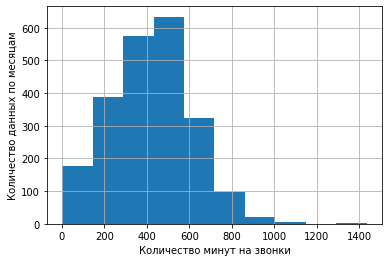

In [65]:
import matplotlib.pyplot as plt
smart[('duration', 'sum')].hist();

plt.xlabel('Количество минут на звонки')
plt.ylabel('Количество данных по месяцам')

In [66]:

x_mb = smart['mb_used']
standard_deviation_mb = np.std(x_mb, ddof=1)

print('Среднее', smart['mb_used'].mean())
variance_estimate_mb = np.var(x_mb, ddof=1)
print('Дисперсия', variance_estimate_mb)
standard_deviation_mb = np.std(x_mb, ddof=1)
print ('Станадратное отклонение', standard_deviation_mb)

Среднее 16236.47262118492
Дисперсия 34443100.68133359
Станадратное отклонение 5868.824471845583


Пользователям ее хватат лимита им по интернету.

Text(0, 0.5, 'Количество данных по месяцам')

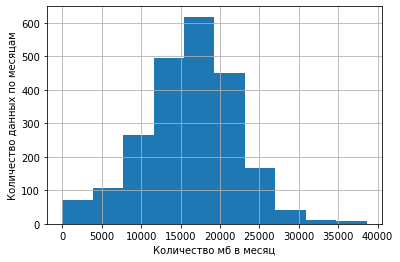

In [67]:
smart['mb_used'].hist();

plt.xlabel('Количество мб в месяц')
plt.ylabel('Количество данных по месяцам')

In [68]:
x_mes = smart['messages_count']
standard_deviation_mes = np.std(x_mes, ddof=1)

print('Среднее', smart['messages_count'].mean())
variance_estimate_mes = np.var(x_mes, ddof=1)
print('Дисперсия', variance_estimate_mes)
standard_deviation_mes = np.std(x_mes, ddof=1)
print ('Станадратное отклонение', standard_deviation_mes)

Среднее 38.736074960957836
Дисперсия 717.2266614610446
Станадратное отклонение 26.781087757241014


Text(0, 0.5, 'Количество данных по месяцам')

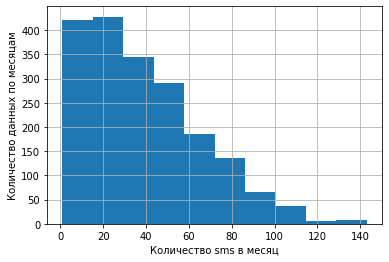

In [69]:
smart['messages_count'].hist()

plt.xlabel('Количество sms в месяц')
plt.ylabel('Количество данных по месяцам')

### Тариф Ультра

In [70]:
print('Среднее', ultra[('duration', 'sum')].mean())
y = ultra[('duration', 'sum')]
variance_estimate_y = np.var(y, ddof=1)
print('Дисперсия', variance_estimate_y)
standard_deviation_y = np.std(y, ddof=1) 
print ('Станадратное отклонение', standard_deviation_y)

Среднее 551.2337246531483
Дисперсия 93124.18142553521
Станадратное отклонение 305.1625491857335


Text(0, 0.5, 'Количество данных по месяцам')

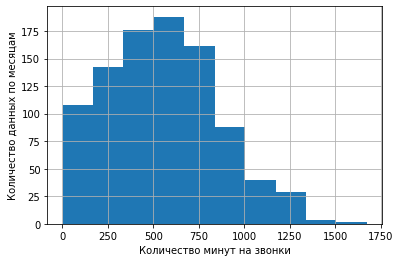

In [71]:
ultra[('duration', 'sum')].hist();

plt.xlabel('Количество минут на звонки')
plt.ylabel('Количество данных по месяцам')

In [72]:

y_mb = ultra['mb_used']
standard_deviation_mb_y = np.std(y_mb, ddof=1)

print('Среднее', ultra['mb_used'].mean())
variance_estimate_mb_y = np.var(y_mb, ddof=1)
print('Дисперсия', variance_estimate_mb)
standard_deviation_mb_y = np.std(y_mb, ddof=1)
print ('Станадратное отклонение', standard_deviation_mb_y)

Среднее 19686.76717948718
Дисперсия 34443100.68133359
Станадратное отклонение 9952.057054094726


Text(0, 0.5, 'Количество данных по месяцам')

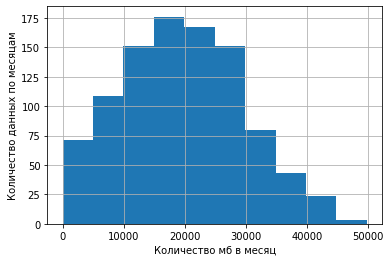

In [73]:
ultra['mb_used'].hist();

plt.xlabel('Количество мб в месяц')
plt.ylabel('Количество данных по месяцам')

In [74]:
y_mes = ultra['messages_count']
standard_deviation_mes_y = np.std(x_mes, ddof=1)

print('Среднее', ultra['messages_count'].mean())
variance_estimate_mes_y = np.var(y_mes, ddof=1)
print('Дисперсия', variance_estimate_mes_y)
standard_deviation_mes_y = np.std(y_mes, ddof=1)
print ('Станадратное отклонение', standard_deviation_mes_y)

Среднее 61.587261146496814
Дисперсия 2119.699327310542
Станадратное отклонение 46.040192520346196


Text(0, 0.5, 'Количество данных по месяцам')

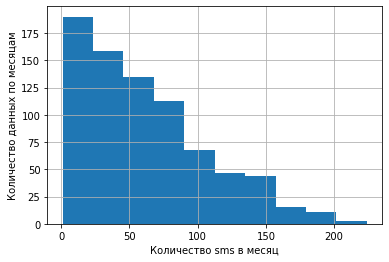

In [75]:
ultra['messages_count'].hist()

plt.xlabel('Количество sms в месяц')
plt.ylabel('Количество данных по месяцам')

## Результаты анализа
* В среднем пользователи тарифа "смарт" тратят на разговоры 419 минут в месяц. Дисперсия 35718, стандартное отклонение 188. Похоже. что большинство пользователей укладываются стандартный пакет, и только некоторые превышают лемиты в  Распределение графика похоже на нормальное.
* В среднем пользователи тарифа "смарт" тратят 16238 мб в месяц. Дисперсия 34511766, станадртное отклонение 5874. Распределение графика похоже на нормальное
* В среднем пользователи тарифа "смарт" пишут 38 сообщений в месяц. Дисперсия 719, стандартное отклонение 26,8. Распределение графика похоже на распределение пуассона. Судя по станадртному отклонению разброс в данных не очень большой. Похоже, что сообщения не самая популярная опция. 
* В среднем пользователи тарифа "ультра" тратят на разговоры 547 минут в месяц, больше, чем пользователи другого тарифа. Дисперсия 93338, стандартное отклонение 305. Очень большое стандартное отклонение, похоже. что лишь некоторые пользователи превышают базовый тариф. 
* В среднем пользователи тарифа "ультра" тратят на  19697 мб в месяц. Это больше, чем у пользователей тарифа "смарт" Дисперсия 34511766, стандартное отклонение 9987. Расспределение графика похоже на нормальное
* В среднем пользователи тарифа "ультра" пишут 60 сообщений в месяц. Больше, чем пользователи смарта. Дисперсия 1974, стандартное отклонение 44 
Похоже, что пользователи более дорого тарифа "Ультра" стремятся как можно лучше оправдать свои вложения в этот тариф, в результате они говорят, пишут и пользуются интернетом гораздо чаще, чем пользователи тарифа "Смарт". В "Смарте" же люди знают цену каждой минуте и мегабайту. Сообщения не самый популярный способ коммуникации, данных по этой категории меньше всего. Поэтому график похож на пуассоновское распределение. Больше всего пользователи предпочитают сидеть в интернете, этот график больше остальных похож на нормальное распределение. 

Пользователи тарифа Смарт в среднем не укладываются в свой лимит по интернету, это единственная их переплата. А пользователи тарифа Ульра тратят на звонки и смс намного меньше, чем предложено в их тарифе (лимит 3000минут и 1000смс), а тратят они 60 смс и 547 минут. С таким же успехом они могли пользоваться смартом, и не переплачивать. Они бы платили дополнительные 150 руб за разговоры 30 рублей за смс и 780 за интернет. Иторого 1510. меньше чем абонентская плата за тариф Ультра 1950

# Проверка гипотез
* Гипотеза 1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различается; 
Следует исходить из того, что выборки взяты из схожих по параметрам совокупностей. Нулевая гипотеза в том, что среднее одной генеральной совокупности(выручка тарифа Ультра) равны  другой генеральной совокупности(выручки тарифа Смарт). Альтернативная гипотеза - они не равны.  
 Мы не можем просто сравнить средние из двух тарифов, потому что не будем знать значима ли полученная разница, можно ли считать разницу в N рублей существенной. 
 Чтобы получить более точный результат надо проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам с помощью метода scipy.stats.ttest_ind. 
 Для проверки гипотезы чаще всего устанавливают уровень значимости от 0.01% до 1%. Для наших данных достаточно будет 0.05%

In [199]:
from scipy import stats as st
import numpy as np
smart_profit = smart['total_profit']
ultra_profit = ultra['total_profit']
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    smart_profit, 
    ultra_profit)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.2343362260799853e-189
Отвергаем нулевую гипотезу


### Вывод
Полученное значение p-value говорит о том, что средняя вырочка тарифа "Смарт" и тарифа "Ультра" не равны. Но какой из них выгоднее? 

In [200]:
smart['total_profit'].describe()

count    2228.000000
mean     1233.656176
std       787.731829
min       550.000000
25%       550.000000
50%       960.496094
75%      1668.337891
max      6711.015625
Name: total_profit, dtype: float64

In [201]:
ultra['total_profit'].describe()

count     975.000000
mean     2061.663612
std       357.952498
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4743.310547
Name: total_profit, dtype: float64

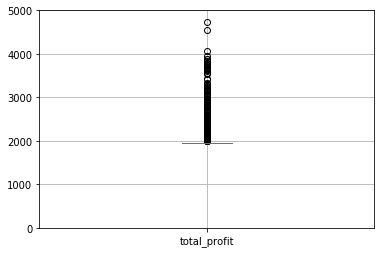

In [202]:
plt.ylim(0, 5000)
ultra.boxplot('total_profit');


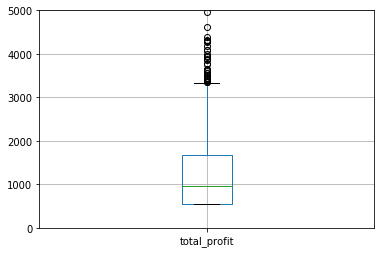

In [203]:
plt.ylim(0, 5000)
smart.boxplot('total_profit');

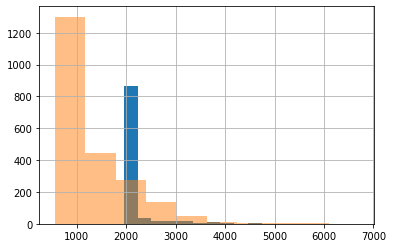

In [204]:
ultra['total_profit'].hist()
smart['total_profit'].hist(alpha = 0.5,)

### Вывод по 1 гипотезе
Из гистограмм и ящика с усами видно, что средняя прибыль тарифа ультра больше, чем средняя прибыль тарифа смарт. (хотя пользователей тарифа Смарт явно больше и на данный момент общая прибыль с этого пакета больше) В основном пользователи укладываются в базовый пакет, и поскольку пакет "Ультра" дороже, он приносит больше прибыли. Но этого не достаточно, чтобы ответить на вопрос, стоит ли вкладывать больше денег в рекламу пакета Ультра. Для ответа на этот вопрос нужно знать, сколько стоит привлечение клиентов из одного и другого тарифа. Привлечь людей на более дешевый тариф должно быть дешевле и проще. Но если цена привлечения одного клиена одинакова, то можно увеличить рекламу пакета "Ультра". 

* Гипотеза 2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

Нулевая гипотеза в том, что среднее одной генеральной совокупности(выручка пользователей из Москвы) равна среднее другой генеральной совокупности(выручки других городов). Альтернативная гипотеза - они не равны

In [205]:
total_data = pd.concat([smart, ultra], ignore_index=True) #соединение двух таблиц


In [206]:
cites_profit = total_data.query('city != "Москва"')['total_profit']
moscow_profit = total_data.query('city == "Москва"')['total_profit']

In [207]:

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    cites_profit, 
    moscow_profit)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.4500790257507138
Не получилось отвергнуть нулевую гипотезу


### Вывод по гипотезе 2
Это странно, но не получилось подвердить, что выручка в Москве отличается от выручки в области.  С вероятностью в почти 20% такое или большее различие можно получить случайно. Это слишком большая вероятность, чтобы делать говорить, что выручки различаются

# Общий вывод
Похоже, что пользователи более дорого тарифа "Ультра" стремятся как можно лучше оправдать свои вложения в этот тариф, в результате они говорят, пишут и пользуются интернетом гораздо чаще, чем пользователи тарифа "Смарт". В "Смарте" же люди знают цену каждой минуте и мегабайту. Сообщения не самый популярный способ коммуникации, данных по этой категории меньше всего. Поэтому график похож на пуассоновское распределение. Больше всего пользователи предпочитают сидеть в интернете, этот график больше остальных похож на нормальное распределение. Большинство пользователей и того и другого тарифа укладываются в свои лимиты. 
* Гипотеза о том, что средняя прыбыль тарифов отличается - верная. Но по нулевой гипотезе нельзя ответить на вопрос какой тариф выгоднее. Из-за того, что пользователей более дешевого пакета больше - общая прибыль у них больше. Но из гистограмм и ящика с усами видно, что средняя прибыль тарифа ультра больше, чем средняя прибыль тарифа смарт. В основном пользователи укладываются в базовый пакет, и поскольку пакет "Ультра" дороже, он приносит больше прибыли. Но этого не достаточно, чтобы ответить на вопрос, стоит ли вкладывать больше денег в рекламу пакета Ультра. Для ответа на этот вопрос нужно знать, сколько стоит привлечение клиентов из одного и другого тарифа. Привлечь людей на более дешевый тариф должно быть дешевле и проще. Но если цена привлечения одного клиена одинакова, то можно увеличить рекламу пакета "Ультра".
* Гипотезу 2 о том, что выручка  из Москвы и пользователей других городов отличается - не удалось потвердить. 